## Testing the BPASS isochrone at 10^7 years age.
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 10^7 years age, solar metallicity, AKs=0.7, and distance of 100 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs M_V), and the mass luminosity relationshi of the cluster.
Important note when I use M_V, it is a pseudo-absolute magnitude. I.e. it is basically absolute magnitude without taking into account extinction.

Formula for pseudo-absolute magnitude:
pseudo-M_V = m_V - 5$log_{10}$(distance to cluster/ 10 pc)

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(7.0, 0.7, 100,math.log10(1), mass_sampling=1, filepath='/g/lu/scratch/ryotainagaki/BPASS_iso_filesTimedIsolated/')

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1771: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to T= 50000 for T= 61325 logg=4.18
Changing to logg=5.00 for T= 61325 logg=4.18
Changing to T= 50000 for T=102953 logg=5.41
Changing to logg=5.00 for T=102953 logg=5.41
Changing to T= 50000 for T=102716 logg=5.41
Changing to logg=5.00 for T=102716 logg=5.41
Changing to T= 50000 for T= 55505 logg=4.24
Changing to logg=5.00 for T= 55505 logg=4.24
Changing to T= 50000 for T=103555 logg=5.41
Changing to logg=5.00 for T=103555 logg=5.41
Changing to logg=4.00 for T= 31478 logg=3.74
Changing to T= 50000 for T=102209 logg=5.40
Changing to logg=5.00 for T=102209 logg=5.40
Changing to T= 50000 for T= 67205 logg=4.32
Changing to logg=5.00 for T= 67205 logg=4.32
Changing to logg=3.00 for T= 22218 logg=2.77
Changing to T= 50000 for T= 71269 logg=4.77
Changing to logg=5.00 for T= 71269 logg=4.77
Changing to logg=5.00 for T= 49043 logg=4.00
Changing to T= 50000 for T= 57106 logg=4.30
Changing to logg=5.00 for T= 57106 logg=4.30
Changing to T= 50000 for T= 65121 logg=4.26
Changing to logg=5.0

Changing to T= 50000 for T=102922 logg=5.42
Changing to logg=5.00 for T=102922 logg=5.42
Changing to T= 50000 for T= 67624 logg=4.65
Changing to logg=5.00 for T= 67624 logg=4.65
Changing to T= 50000 for T= 67593 logg=4.33
Changing to logg=5.00 for T= 67593 logg=4.33
Changing to logg=4.50 for T= 43082 logg=3.76
Changing to T= 50000 for T=102537 logg=5.40
Changing to logg=5.00 for T=102537 logg=5.40
Changing to T= 50000 for T= 52802 logg=3.95
Changing to logg=5.00 for T= 52802 logg=3.95
Changing to T= 50000 for T=102440 logg=5.41
Changing to logg=5.00 for T=102440 logg=5.41
Changing to T= 50000 for T= 91289 logg=5.38
Changing to logg=5.00 for T= 91289 logg=5.38
Changing to T= 50000 for T= 67806 logg=4.33
Changing to logg=5.00 for T= 67806 logg=4.33
Changing to T= 50000 for T= 80581 logg=5.10
Changing to logg=5.00 for T= 80581 logg=5.10
Changing to T= 50000 for T= 67630 logg=4.33
Changing to logg=5.00 for T= 67630 logg=4.33
Changing to logg=4.50 for T= 44663 logg=3.83
Changing to T= 50000

Changing to T= 50000 for T=103314 logg=5.40
Changing to logg=5.00 for T=103314 logg=5.40
Changing to T= 50000 for T= 65749 logg=4.28
Changing to logg=5.00 for T= 65749 logg=4.28
Changing to T= 50000 for T= 93233 logg=5.17
Changing to logg=5.00 for T= 93233 logg=5.17
Changing to T= 50000 for T=103409 logg=5.41
Changing to logg=5.00 for T=103409 logg=5.41
Changing to T= 50000 for T=102056 logg=5.41
Changing to logg=5.00 for T=102056 logg=5.41
Changing to T= 50000 for T= 65967 logg=4.28
Changing to logg=5.00 for T= 65967 logg=4.28
Changing to T= 50000 for T=103302 logg=5.45
Changing to logg=5.00 for T=103302 logg=5.45
Changing to T= 50000 for T= 66243 logg=4.29
Changing to logg=5.00 for T= 66243 logg=4.29
Changing to T= 50000 for T= 67353 logg=4.32
Changing to logg=5.00 for T= 67353 logg=4.32
Changing to T= 50000 for T= 78201 logg=4.55
Changing to logg=5.00 for T= 78201 logg=4.55
Changing to T= 50000 for T=101007 logg=5.42
Changing to logg=5.00 for T=101007 logg=5.42
Changing to T= 50000 

Changing to T= 50000 for T= 65498 logg=4.28
Changing to logg=5.00 for T= 65498 logg=4.28
Changing to T= 50000 for T= 94748 logg=5.39
Changing to logg=5.00 for T= 94748 logg=5.39
Changing to logg=4.50 for T= 41743 logg=3.70
Changing to T= 50000 for T= 66702 logg=4.30
Changing to logg=5.00 for T= 66702 logg=4.30
Changing to T= 50000 for T=173680 logg=5.88
Changing to logg=5.00 for T=173680 logg=5.88
Changing to logg=3.50 for T= 26443 logg=3.24
Changing to T= 50000 for T= 65814 logg=4.28
Changing to logg=5.00 for T= 65814 logg=4.28
Changing to logg=3.00 for T= 25019 logg=2.99
Changing to T= 50000 for T= 80822 logg=5.09
Changing to logg=5.00 for T= 80822 logg=5.09
Changing to T= 50000 for T= 67619 logg=4.34
Changing to logg=5.00 for T= 67619 logg=4.34
Changing to T= 50000 for T=103024 logg=5.41
Changing to logg=5.00 for T=103024 logg=5.41
Changing to T= 50000 for T= 96381 logg=5.41
Changing to logg=5.00 for T= 96381 logg=5.41
Changing to T= 50000 for T= 50852 logg=4.07
Changing to logg=5.0

Changing to T= 50000 for T= 65670 logg=4.28
Changing to logg=5.00 for T= 65670 logg=4.28
Changing to T=  1200 for T=   808 logg=4.44
Changing to T=  1200 for T=   808 logg=4.44
Changing to logg=0.00 for T=  3554 logg=-0.25
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=5.00 for T=  1616 logg=4.44
Changing to logg=5.00 for T=  1616 logg=4.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to T= 50000 for T= 76273 logg=5.44
Changing to logg=5.00 for T= 76273 logg=5.44
Changing to logg=2.00 for T=  9772 logg=1.67
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to T= 50000 for T= 69480 logg=4.37
Changing to logg=5.00 for T= 69480 logg=4.37
Changing to T=  1200 for T=   808 logg=4.44
Changing to T= 50000 for T= 66362 logg=4.28
Changing to logg=5.00 for T= 66362 logg=4.28
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to T= 50000 for T= 82393 logg=5.42
Changing to lo

Changing to T=  1200 for T=   692 logg=4.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=0.00 for T=  3554 logg=-0.25
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to T= 50000 for T= 71010 logg=4.41
Changing to logg=5.00 for T= 71010 logg=4.41
Changing to logg=0.00 for T=  3554 logg=-0.25
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to T= 50000 for T= 72304 logg=4.45
Changing to logg=5.00 for T= 72304 logg=4.45
Changing to T= 50000 for T= 68524 logg=4.35
Changing to logg=5.00 for T= 68524 logg=4.35
Changing to T= 50000 for T= 67298 logg=4.32
Changing to logg=5.00 for T= 67298 logg=4.32
Changing to T= 50000 for T= 81506 logg=5.45
Changing to logg=5.00 for T= 81506 logg=5.45
Changing to logg=0.00 for T=  3554 logg=-0.25
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to logg=1.50 for T=  8770 logg=1.44
Changing t

Changing to logg=1.50 for T=  8770 logg=1.44
Changing to T= 50000 for T=101375 logg=5.40
Changing to logg=5.00 for T=101375 logg=5.40
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to T= 50000 for T= 67825 logg=4.33
Changing to logg=5.00 for T= 67825 logg=4.33
Changing to T=  1200 for T=   808 logg=4.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to T= 50000 for T= 70351 logg=4.40
Changing to logg=5.00 for T= 70351 logg=4.40
Changing to logg=3.00 for T= 19590 logg=2.49
Changing to T= 50000 for T=101037 logg=5.40
Changing to logg=5.00 for T=101037 logg=5.40
Changing to T=  1200 for T=   692 logg=4.44
Changing to T= 50000 for T=100510 logg=5.42
Changing to logg=5.00 for T=100510 logg=5.42
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to T= 50000 for T= 63004 logg=4.19
Changing to logg=5.00 for T= 63004 logg=4.19
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to T= 50000 for T= 77947 logg=5.46
Changing to logg=5.00 for T= 77947 logg=5.46
Changing to logg=1

Starting filter: ubv,V   Elapsed time: 11.41 seconds
Starting synthetic photometry
Singles
M =   1.800 Msun  T =  8138 K  m_ubv_V = 17.55
Primaries
M =  11.000 Msun  T = 24663 K  m_ubv_V = 12.58
M =  10.000 Msun  T = 25914 K  m_ubv_V = 12.01
M =  13.000 Msun  T = 26107 K  m_ubv_V = 12.00
M =  15.000 Msun  T = 26270 K  m_ubv_V = 11.35
M =  16.000 Msun  T = 24883 K  m_ubv_V = 10.87
M =   1.200 Msun  T =  5987 K  m_ubv_V = 19.59
M =   1.400 Msun  T =  2739 K  m_ubv_V =  nan
M =  13.000 Msun  T = 26107 K  m_ubv_V = 12.00
M =   0.501 Msun  T =  2739 K  m_ubv_V =  nan
M =   8.000 Msun  T = 26108 K  m_ubv_V = 11.52
M =  15.000 Msun  T = 26270 K  m_ubv_V = 11.35
M =   0.398 Msun  T =   nan K  m_ubv_V =  nan
M =  16.000 Msun  T = 24883 K  m_ubv_V = 10.87
M =   5.012 Msun  T =  2739 K  m_ubv_V =  nan
M =  18.000 Msun  T = 27462 K  m_ubv_V = 10.37
M =  11.000 Msun  T = 24577 K  m_ubv_V = 12.55
M =   1.200 Msun  T =  5987 K  m_ubv_V = 19.59
M =  15.000 Msun  T = 25823 K  m_ubv_V = 11.25
M =  18.00

M =   1.400 Msun  T =  6571 K  m_ubv_R = 15.75
M =   8.000 Msun  T = 22663 K  m_ubv_R = 11.19
M =  15.000 Msun  T = 25833 K  m_ubv_R = 8.75
M =   3.600 Msun  T = 13875 K  m_ubv_R = 13.08
M =   3.300 Msun  T = 13101 K  m_ubv_R = 13.29
M =   0.600 Msun  T =  3462 K  m_ubv_R = 20.46
M =  12.000 Msun  T = 27502 K  m_ubv_R = 9.95
M =   5.400 Msun  T =   nan K  m_ubv_R =  nan
M =  18.000 Msun  T =  8770 K  m_ubv_R = 5.11
M =   2.600 Msun  T = 11099 K  m_ubv_R = 13.89
M =   5.200 Msun  T = 17553 K  m_ubv_R = 12.24
M =   3.000 Msun  T = 12276 K  m_ubv_R = 13.53
M =   8.000 Msun  T = 21330 K  m_ubv_R = 11.01
M =   1.120 Msun  T =  5956 K  m_ubv_R = 16.87
M =   1.800 Msun  T =  8303 K  m_ubv_R = 14.88
M =  11.000 Msun  T = 24743 K  m_ubv_R = 10.08
M =  12.000 Msun  T = 25289 K  m_ubv_R = 9.73
M =  13.300 Msun  T = 28197 K  m_ubv_R = 9.56
M =   5.100 Msun  T = 17346 K  m_ubv_R = 12.28
M =   4.500 Msun  T = 16036 K  m_ubv_R = 12.57
Starting filter: ubv,I   Elapsed time: 39.42 seconds
Starting synt

For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101 or of 110. Note that we will have a phase of 110 in order to indicate a mystery compact remnant that BPASS provides for NEWSECMODS (secondary star models with compact primaries). This is since we haven't added neutron stars or black holes yet. Stars with phase of -99 exist, and those are the secondary stars that have already merged.

In [2]:
import numpy as np
np.all([(x==5 or x==101) for x in iso1.primaries['phase']])

False

In [3]:
np.all([(x==5 or x==101) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x==5 or x==101 or x==-99) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries, single stars, and secondaries. 

In [5]:
import numpy as np
np.max(iso1.singles['logg'])

4.585626078546701

In [6]:
import numpy as np
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

5.916387471716592

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg']))

5.7676806790772

In [8]:
np.mean(iso1.singles['logg'])

4.148394193281249

In [9]:
np.mean((np.nan_to_num(iso1.secondaries['logg'])))

3.7622722522134566

In [10]:
np.mean((np.nan_to_num(iso1.primaries['logg'])))

4.035012310497645

In [11]:
np.median(iso1.singles['logg'])

4.16304552121136

In [12]:
np.median(iso1.primaries['logg'])

nan

Text(0.5, 0, 'logg in cgs')

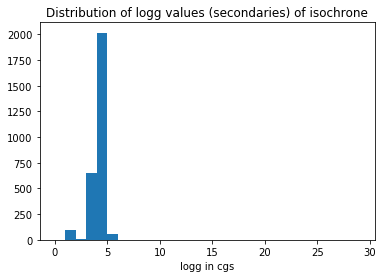

In [13]:
import matplotlib.pyplot as plt
plt.title("Distribution of logg values (secondaries) of isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

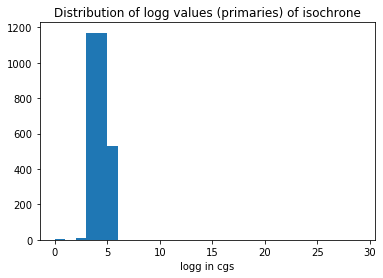

In [14]:
import matplotlib.pyplot as plt
plt.title("Distribution of logg values (primaries) of isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

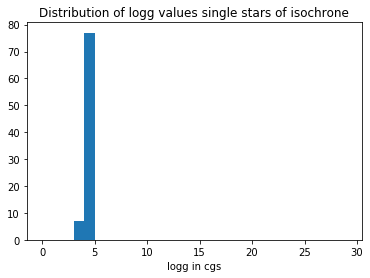

In [15]:
import matplotlib.pyplot as plt
plt.title("Distribution of logg values single stars of isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

In [16]:
iso2=synthetic.IsochronePhot(7.0, 0.7, 100, math.log(1), recomp=True) # New MIST v.1 isochrone for same metallicity

Changing to logg=3.50 for T= 26068 logg=3.41
Changing to logg=3.50 for T= 26167 logg=3.41
Changing to logg=3.50 for T= 26263 logg=3.42
Changing to logg=3.50 for T= 26355 logg=3.42
Changing to logg=3.50 for T= 26443 logg=3.42
Changing to logg=3.50 for T= 26528 logg=3.43
Changing to logg=3.50 for T= 26609 logg=3.43
Changing to logg=3.50 for T= 26685 logg=3.43
Changing to logg=3.50 for T= 26758 logg=3.43
Changing to logg=3.50 for T= 26826 logg=3.44
Changing to logg=3.50 for T= 26889 logg=3.44
Changing to logg=3.50 for T= 26943 logg=3.44
Changing to logg=3.50 for T= 26985 logg=3.44
Changing to logg=3.50 for T= 27008 logg=3.45
Changing to logg=3.50 for T= 27006 logg=3.45
Changing to logg=3.50 for T= 26955 logg=3.45
Changing to logg=3.50 for T= 26861 logg=3.44
Changing to logg=3.50 for T= 26740 logg=3.44
Changing to logg=3.50 for T= 26600 logg=3.44
Changing to logg=3.50 for T= 26446 logg=3.43
Changing to logg=3.50 for T= 26289 logg=3.42
Changing to logg=3.50 for T= 26128 logg=3.41
Changing t

In [17]:
np.max(iso2.points['logg'])

4.3301956912058674

(array([ 60.,  57.,  78., 149., 210.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

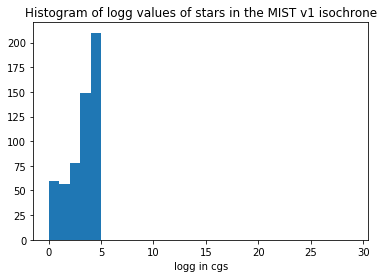

In [18]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the MIST v1 isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))

In [19]:
np.median(iso2.points['logg'])

3.44315451781853

In [20]:
np.mean(iso2.points['logg'])

3.1148461826295915

In [21]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


Make the clusters corresponding to the binary star isochrone and the MISTv.1 isochrone

In [22]:
clus_1=synthetic.Binary_Cluster(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 2000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 2000, ifmr=ifmr.IFMR_Spera15())

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


Now let's visualize the isochrone we have created so far with a color magnitude diagram. There we can see the end of main sequence and perhaps the beginnings of the subgiant branch. That turnoff will turn out to be quite important when using the clusters to find age of real stellar populations.\n But first, let's look at the isochrones and plot the observers' and theorist's HR diagrams and juxtapose the evolution models.

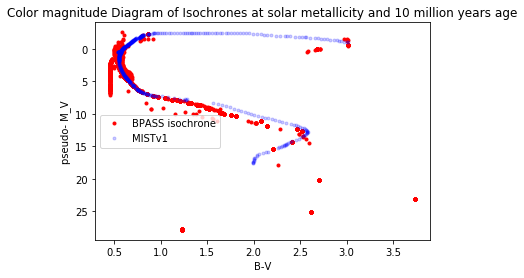

In [23]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(100), "r.")
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100), "r.")
plt.plot(iso1.singles['m_ubv_B']-iso1.singles["m_ubv_V"], iso1.singles["m_ubv_V"]-5*np.log10(100), "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B']-iso2.points["m_ubv_V"], iso2.points["m_ubv_V"]-5*np.log10(100), "b.", label="MISTv1", alpha =0.2)
plt.xlabel("B-V")
plt.ylabel("pseudo- M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 10 million years age")
plt.gca().invert_yaxis()
plt.legend()

Hmm, where is the vertical line coming from

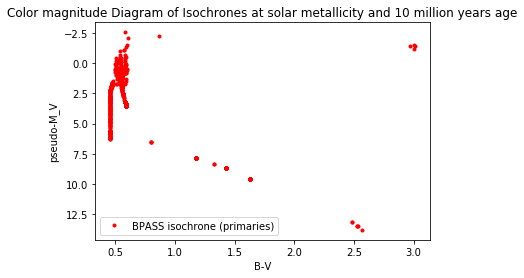

In [24]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(100), "r.",  label="BPASS isochrone (primaries)")
plt.xlabel("B-V")
plt.ylabel("pseudo-M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 10 million years age")
plt.gca().invert_yaxis()
plt.legend()

In [25]:
line = iso1.primaries[np.where(((iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"])>0.45) & ((iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"])<=0.4583))[0]]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)


In [26]:
iso1.secondaries[np.where(((iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"])>0.45) & ((iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"])<=0.4583))[0]]

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64,float64,float64,float64,float64
16.0,-0.40774340868802916,1.9302871923808372e+31,21408.192439307928,11350160513.7744,3.4660199344483207,False,28.38653,5.0,False,1,10.242322162080631,10.50796545228821,11.098533039040335,7.995286838024205,4.668898702963345
11.4,-0.5084654086880291,4.68653569420061e+30,26918.44696161242,3537300890.0056734,4.0887331667704565,False,11.56553,5.0,False,1,12.21371566506624,12.628850533465604,13.177132662416641,10.14135896795864,6.856552280830484
15.200000000000001,-0.3038524086880292,1.5501078981690119e+31,27721.708978258855,6065854703.383108,3.74361242111509,False,15.36331,5.0,False,1,10.90976074381617,11.366843318689433,11.90728775219577,8.881304153395849,5.602425390031274
16.2,-0.2998124086880294,2.0444755873590473e+31,26562.564379980977,7587557641.393461,3.5740682195121476,False,16.26899,5.0,False,1,10.52251965554147,10.957957137341195,11.507198330344771,8.467308149105392,5.181017741845765
3.8000000000000003,0.1823685913119708,7.631359784926211e+28,14385.00443094354,1580672884.7327638,4.305050422942249,False,3.800343,5.0,False,1,15.696481818094357,15.513398713158223,16.20865425870235,12.95645538566047,9.542650409975328
1.9000000000000001,-0.5123974086880292,4.929489309509867e+27,8701.016655822772,1098049714.4935458,4.32042808548312,False,1.90003,5.0,False,1,18.39288856955239,17.379572008411067,18.351975914716615,14.71533461521816,11.140254091904245
6.0,0.15043659131197096,4.126310728886609e+29,19146.96749486642,2074636447.4311144,4.267406750115069,False,6.003149,5.0,False,1,14.313370572170259,14.430567057463097,15.051772956614654,11.907023868661955,8.557095001809065
1.8,-0.9953354086880293,3.9226714005293314e+27,8303.477247785491,1075528698.8273094,4.315183751523423,False,1.80101,5.0,False,1,18.65379805300129,17.57741456525376,18.61992449726684,14.880370930338435,11.283766303213675


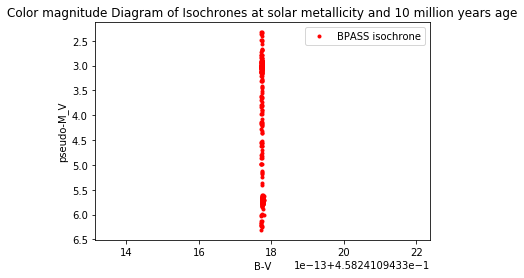

In [27]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(line['m_ubv_B']-line["m_ubv_V"], line["m_ubv_V"]-5*np.log10(100), "r.",  label="BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("pseudo-M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 10 million years age")
plt.gca().invert_yaxis()
plt.legend()

What exactly is causing this line. We need to look specifically at the properties of the stars there.

In [28]:
line

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
20.0,-0.40774340868802916,4.412979694274203e+31,61325.34498447098,2092546724.8954647,4.177496480016477,True,4.9816,5.0,1,12.127692839410303,12.782864183602355,13.241105277934127,10.315417694201308,7.084490434830406
19.0,-0.5084654086880291,2.310584890770242e+31,102953.23557268221,537242256.1087389,5.4120192355523145,True,5.63497,5.0,1,15.080217839410306,15.735389183602358,16.193630277934133,13.26794269420131,10.037015434830408
19.0,-0.3038524086880292,2.3522957780992267e+31,102716.44970160333,544571820.1339548,5.406885613781115,True,5.72187,5.0,1,15.050792839410304,15.705964183602353,16.16420527793413,13.238517694201306,10.007590434830405
18.0,-0.2998124086880294,2.960137802369818e+31,55504.73071690754,2092113125.8044019,4.243198652621343,True,5.7931,5.0,1,12.128142839410302,12.78331418360235,13.241555277934125,10.315867694201303,7.084940434830405
19.0,0.1823685913119708,2.460435185909145e+31,103554.7441491209,547967958.0343926,5.4072865064767015,True,5.79881,5.0,1,15.037292839410307,15.692464183602358,16.150705277934133,13.225017694201311,9.99409043483041
19.0,-0.5123974086880292,2.3415957927214727e+31,102209.20257904973,548738161.9525678,5.401647413762852,True,5.73984,5.0,1,15.034242839410311,15.68941418360236,16.147655277934135,13.221967694201313,9.991040434830412
20.0,0.15043659131197096,5.227956064158395e+31,67204.75466282961,1896510118.8251495,4.3157473551323156,True,5.626,5.0,1,12.341292839410302,12.996464183602352,13.454705277934126,10.529017694201306,7.298090434830406
18.0,-0.9953354086880293,2.317991980460485e+31,71268.89085463733,1122910555.3611505,4.7689795319213255,True,5.60005,5.0,1,13.479342839410306,14.134514183602354,14.592755277934126,11.667067694201307,8.436140434830406


In [29]:
np.unique(line['mass_current'])

4.44683
4.44977
4.5998
4.65934
4.82873
4.84274
4.87838
4.93716
4.94025
4.94141
4.94283


In [30]:
np.unique(line['source'])

1


In [31]:
np.unique(np.round(line['logg'], 1))

array([3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.8, 5.9])

In [32]:
np.unique(line['mass'])

18.0
19.0
20.0
21.0
22.0
23.0
24.0


Ah, that may be it: the initial mass of the stars seem to be around the same so it may be no surprise that there is an issue with the line. Something to look into.

In [33]:
np.unique(line['Teff'])

50618.58492369347
50852.22969589034
51386.613785233334
52234.807674770746
52338.346733117745
52571.45536477341
52801.95467813457
53144.704917031086
54368.831599590194
54474.09200599129
54788.57437110441


In [34]:
np.unique(line['logg'])

3.946765191022875
3.980032030118002
4.064789313032161
4.073869467356354
4.093679606265179
4.125200311792465
4.129084829060066
4.129157361932568
4.1340233012210135
4.137856285342354
4.158507279190058


In [35]:
np.unique(np.round(np.log10(line['L']), 1))

array([31. , 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. ,
       32.1])

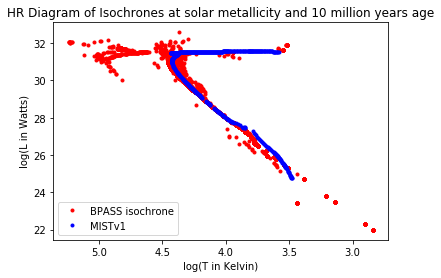

In [36]:
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]), "r.")
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]), "r.")
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]), "b.", label="MISTv1")
plt.xlabel("log(T in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of Isochrones at solar metallicity and 10 million years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

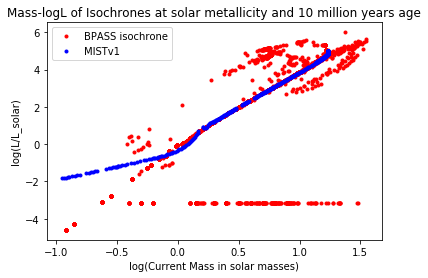

In [37]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']), np.log10(iso1.secondaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']), np.log10(iso1.singles["L"]/cs.L_sun), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']), np.log10(iso2.points["L"]/cs.L_sun), "b.", label="MISTv1")
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("Mass-logL of Isochrones at solar metallicity and 10 million years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Which table is causing that line?
The primaries seem to be causing that issue.

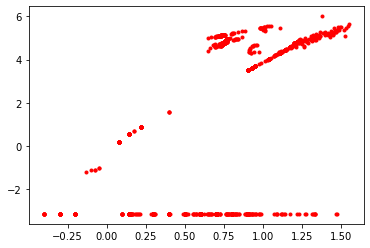

In [38]:
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.", label="BPASS isochrone")

Which type of secondary star is it that is causing this strange pattern?

In [39]:
bad_line = iso1.primaries[np.where((np.log10(iso1.primaries["L"]/cs.L_sun)>-4) & (np.log10(iso1.primaries["L"]/cs.L_sun)<-2))[0]]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [40]:
bad_line

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
7.94328,0.4736675913119708,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,5.338067498968938,False,7.94328,110.0,4,nan,nan,nan,nan,nan
3.16228,1.0592325913119707,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.938067948646069,False,3.16228,110.0,4,nan,nan,nan,nan,nan
1.4,-1.5612380086880293,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.628521191018658,False,1.550435,110.0,3,nan,nan,nan,nan,nan
3.98107,1.0218025913119706,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,5.038067441246554,False,3.98107,110.0,4,nan,nan,nan,nan,nan
1.4,1.272567591311971,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.584195662981371,False,1.4,110.0,4,nan,nan,nan,nan,nan
1.4,-0.45007040868802917,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.584195662981371,False,1.4,110.0,4,nan,nan,nan,nan,nan
7.94328,0.6070005913119707,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,5.338067498968938,False,7.94328,110.0,4,nan,nan,nan,nan,nan
1.4,0.3000205913119709,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.584195662981371,False,1.4,110.0,4,nan,nan,nan,nan,nan


What sorts of characteristics (logg, Teff, L) can be causing it? Let's find out

In [41]:
np.unique(bad_line['L'])

2.6668705105418817e+23


In [42]:
np.unique(bad_line['Teff'])

2738.7349246249955


In [43]:
np.unique(bad_line['logg'])

4.038067441246554
4.138067424857716
4.23806739019378
4.538069210104485
4.584195662981371
4.584533350726831
4.584544199514462
4.584582013169922
4.58467870197079
4.584705969279498
4.584723630145464


In [44]:
np.unique(bad_line['mass'])

0.398107
0.501187
0.630957
1.25893
1.4
1.99526
2.51189
3.16228
3.98107
5.01187
6.30957


In [45]:
np.unique(bad_line['mass_current'])

0.398107
0.501187
0.630957
1.25893
1.4
1.401089
1.401124
1.401246
1.401558
1.401646
1.401703


In [46]:
np.unique(bad_line['isWR'])

False


In [47]:
np.unique(bad_line['phase'])

110.0


So it looks like the stars causing the line are compact remnants from the NEWSECMODS. For now, I have designated them as mystery compact remnants. That is fine for now, even though it may look a bit dismaying.

Ah, so perhaps the horizontal line with the mass- luminosity plot causes the horizontal line in the CMD. Not surprising, as this lack of variation in the luminosity ends up creating lack of variation in M_V.
Now onto examining the companions table for the cluster.

In [48]:
clus_1.companions

system_idx,mass,Teff,L,logg,isWR,mass_current,phase,metallicity,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I,log_a,e,i,Omega,omega
int64,float64,float64,float64,float64,bool,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,1.1,5905.273274791816,4.233718019471322e+26,4.475800312461359,False,1.1,5,0.0,21.582327240247473,19.92754332589488,21.584439725847403,16.955139607176314,13.129029869574783,-0.8184116097655425,0.9814457611708565,128.85239316148326,121.18874235524085,64.64925796980019
0,8.5,21928.554271313136,1.5375240902039437e+30,4.080065285565178,False,8.48316,5,0.0,13.092601643007603,13.341701143835568,13.929748056196226,10.833936721602733,7.512002630428639,2.622807894383729,0.44455285876537665,94.63922434454359,221.78251367303366,212.14501917114487
0,7.5,20636.21291138488,9.537662032051415e+29,4.1280329185090565,False,7.49351,5,0.0,13.515141524825404,13.70853562093671,14.309758461341465,11.193998801745966,7.8595911794232025,1.0485573327481452,0.18303973885487695,13.610574800154975,359.7072713191484,267.6727798314125
1,1.1199999999999999,5956.347129051855,4.614258587035191e+26,4.461225649973315,False,1.12,5,0.0,21.456457239316983,19.832741538617416,21.47144088724265,16.86655247081092,13.046920105975458,0.2814184928413217,0.31925877312867706,41.22415928655573,300.66294048719635,212.49559944959978
2,0.6,3462.262564585446,2.976678489449759e+25,4.438058877686777,False,0.6,5,0.0,27.27626626769178,24.382098475286046,26.79137659954946,20.462775520878672,15.688463901881187,-1.3030399395042436,0.846245693513129,59.5724553840226,114.67357867853401,85.73688731993165
2,0.86,4985.514687036238,1.3002052912942706e+26,4.585626078546701,False,0.86,5,0.0,23.838171088516376,21.362203513198704,23.37425761799386,18.237271585878233,14.259440506025383,1.9103241498732522,0.4588398587161617,112.27282994512163,132.97512842963104,50.180120648037125
3,0.96,5539.620324568145,3.1212742470125126e+26,4.438058860342702,False,0.96,5,0.0,22.228178073936636,20.287146060343368,22.094395521387543,17.264666825551412,13.386068515125912,1.068058326263086,0.25580905088849465,98.13412786073485,180.45588950785552,238.1230425371516
4,0.5,3758.374042884443,1.449846181570299e+25,4.813857631639152,False,0.5,5,0.0,27.67752155105963,24.53030292257732,27.122862504528776,20.964341734531565,16.505852701957764,0.6562953080407514,0.578073988867552,88.35228941908117,84.00434364881781,306.1600379733339
5,1.1199999999999999,5956.347129051855,4.614258587035191e+26,4.461225649973315,False,1.12,5,0.0,21.456457239316983,19.832741538617416,21.47144088724265,16.86655247081092,13.046920105975458,1.2752310875339294,0.9944758595708653,67.11442718101306,245.7497614333954,47.664621857360515


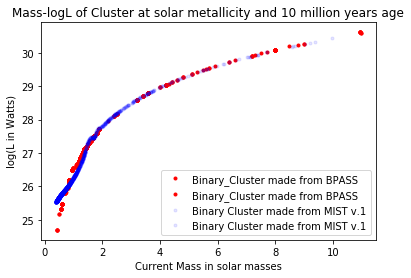

In [49]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
plt.plot((clus_1.star_systems['mass_current']), np.log10(clus_1.star_systems["L"]), "r.", label="Binary_Cluster made from BPASS", alpha =1)
plt.plot((clus_1.companions['mass_current']), np.log10(clus_1.companions["L"]), "r.", label="Binary_Cluster made from BPASS", alpha = 1)
plt.plot((clus_2.star_systems['mass_current']), np.log10(clus_2.star_systems["L"]), "b.", label="Binary Cluster made from MIST v.1", alpha =0.1)
plt.plot((clus_2.companions['mass_current']), np.log10(clus_2.companions["L"]), "b.", label="Binary Cluster made from MIST v.1", alpha = 0.1)
plt.xlabel("Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("Mass-logL of Cluster at solar metallicity and 10 million years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Now go back to the shape of the clusters' Color magnitude diagrams.

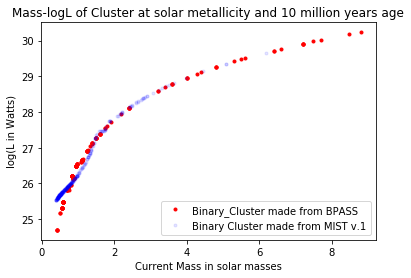

In [50]:
from astropy import constants as cs
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
plt.plot((clus_1.companions['mass_current']), np.log10(clus_1.companions["L"]), "r.", label="Binary_Cluster made from BPASS", alpha = 1)
plt.plot((clus_2.companions['mass_current']), np.log10(clus_2.companions["L"]), "b.", label="Binary Cluster made from MIST v.1", alpha = 0.1)
plt.xlabel("Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("Mass-logL of Cluster at solar metallicity and 10 million years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

In [51]:
np.unique((clus_1.companions['mass_current']))

0.42
0.5
0.56
0.6
0.7
0.72
0.75
0.8
0.84
0.86
0.88


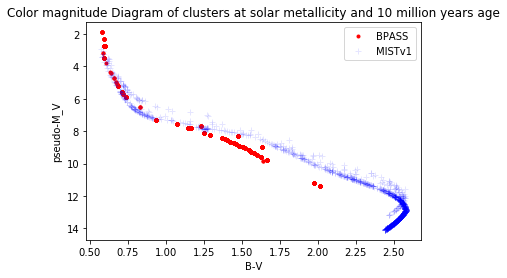

In [52]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['m_ubv_B']-clus_1.star_systems["m_ubv_V"], clus_1.star_systems["m_ubv_V"]-5*np.log10(100), "r.",label="BPASS")
plt.plot(clus_2.star_systems['m_ubv_B']-clus_2.star_systems["m_ubv_V"], clus_2.star_systems["m_ubv_V"]-5*np.log10(100), "b+", label="MISTv1", alpha=0.1)
plt.xlabel("B-V")
plt.ylabel("pseudo-M_V")
plt.title("Color magnitude Diagram of clusters at solar metallicity and 10 million years age")
plt.gca().invert_yaxis()
plt.legend()

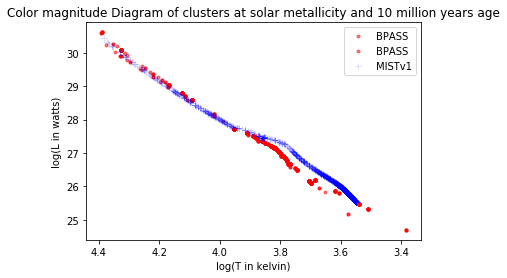

In [53]:
import matplotlib.pyplot as plt
plt.plot(np.log10(clus_1.companions['Teff']), np.log10(clus_1.companions["L"]), "r.",label="BPASS", alpha=0.5)
plt.plot(np.log10(clus_2.companions['Teff']), np.log10(clus_2.companions["L"]), "b+", alpha=0.15)
plt.plot(np.log10(clus_1.star_systems['Teff']), np.log10(clus_1.star_systems["L"]), "r.",label="BPASS", alpha=0.5)
plt.plot(np.log10(clus_2.star_systems['Teff']), np.log10(clus_2.star_systems["L"]), "b+", label="MISTv1", alpha=0.15)
plt.xlabel("log(T in kelvin)")
plt.ylabel("log(L in watts)")
plt.title("Color magnitude Diagram of clusters at solar metallicity and 10 million years age")
plt.gca().invert_xaxis()
plt.legend()

Looking at which stars are the white dwarves?

In [54]:
import numpy as np
np.where(clus_1.star_systems['phase']==101.0)[0]

array([ 19,  24,  77,  80,  90, 122, 130, 138, 150])

Black Holes?

In [55]:
np.where(clus_1.star_systems['phase']==103.0)[0]

array([], dtype=int64)

Do we have any neutron stars?

In [56]:
np.where(clus_1.star_systems['phase']==102.0)[0]

array([], dtype=int64)

Let's make sure that I am getting just about enough star mass for my cluster. (It was a bug before I used an adjustment factor.)

In [57]:
clus_1.star_systems['systemMass'].sum()

2217.550504139359

In [58]:
clus_2.star_systems['systemMass'].sum()

1999.590128899988

In [59]:
len(np.where(clus_1.star_systems['merged'])[0])

11

What systems do all of these companions correspond to?

In [60]:
clus_1.companions[['system_idx']]

log_a,system_idx
float64,int64
-0.8184116097655425,0
2.622807894383729,0
1.0485573327481452,0
0.2814184928413217,1
-1.3030399395042436,2
1.9103241498732522,2
1.068058326263086,3
0.6562953080407514,4
1.2752310875339294,5
